# Graph traversal, cellular automata, and percolation 

Imports: Make sure these are installed in your conda env, and that the conda env is active in your notebook
+ numpy
+ matplotlib
+ scipy
+ jupyter

For interactive plots:

+ ipykernel

**A note on cloud-hosted notebooks.** If you are running a notebook on a cloud provider, such as Google Colab or CodeOcean, remember to save your work frequently. Cloud notebooks will occasionally restart after a fixed duration, crash, or prolonged inactivity, requiring you to re-run code.

<!-- [Click here to open this notebook in Colab](https://colab.research.google.com/github/williamgilpin/cphy/blob/main/hw/cellular_automata_complexity.ipynb) -->
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/williamgilpin/cphy/blob/main/hw/cellular_automata_complexity.ipynb)



In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

# The Abelian sandpile

### Background

We are going to implement the celebrated [Bak-Tang-Wiesenfeld model](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.59.381), also known as the "Abelian sandpile." This cellular automaton describes a lattice in which sand grains are continuously dropped onto random locations at a fixed rate, resulting in the formation of random sandpiles. When the sandpiles grow too high, they topple, resulting in avalanches that distribute grains to all of their neighbors.

If we denote the number of grains at a site $(x, y)$ as $z(x, y)$, a single "topple" event of the BTW model has the following update rule, which triggers only when $z \geq 4$.

$$
z(x, y) \rightarrow z(x, y) - 4
$$

$$
\begin{array}{lr}
    z(x + 1, y) \leftarrow z(x + 1, y) + 1    \\
    z(x - 1, y) \leftarrow z(x - 1, y) + 1    \\
    z(x, y + 1) \leftarrow z(x, y + 1) + 1    \\
    z(x, y - 1) \leftarrow z(x, y - 1) + 1    \\
\end{array}
$$

A topple event thus consists of a single site decreasing in height by four grains, and then distributing these grains to each of its north, south, east, and west neighbors---but not its diagonal neighbors.

After a single topple event, the entire lattice is checked again to see if any other sites now have $z \geq 4$, in which case those sites are toppled, too. If a site located at the boundary of the domain topples, then any grains that would go out of bounds are assumed to be permanently lost from the system. After all sites reach a state where $z \leq 4$, the avalanche has concluded. We then add a sand grain to a random new site, and calculate any new resulting avalanches.

This idealized system has several interesting properties: the continuous addition of grains represents a slow-timescale driving process, which effectively injects energy into the system. The avalances represent fast-timescale response dynamics, and the grains that fall off the edges represent dissipation---they prevent avalanches from continuing forever undriven. Despite its seeming simplicity, the BTK model represents perhaps the earliest widely-studied toy model of "self-organized criticality," a well-known hypothesis in nonequilibrium statistical physics that driven, dissipative systems tend to tune themselves into maximally-critical states (there are always sandpiles on the verge of toppling). The sandpile has been used as a thought experiment describing an incredible array of diverse systems, including: starts and stops in dragging friction, [earthquakes](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/JB094iB11p15635), timings between geyser eruptions, [timings of pulsar glitches](https://arxiv.org/abs/1403.6528), [fluctuations in an ultracold atomic gas](https://www.nature.com/articles/s41586-019-1908-6), [neuronal activity patterns in the brain](https://www.frontiersin.org/articles/10.3389/fnsys.2014.00166/full), [flux pinning](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.67.919), and many other areas.

A simple signature of self-organized-criticality observed in the sandpile model, which also represents an easy readout for experimental data, is the appearance of $1/f$ noise in the system's power spectrum, where $f$ denotes frequency. This distribution implies that avalanche durations have a skewed distribution, where larger events happen less frequently. For an experimental system, this results in "crackling" or brown noise in the detector. In the BTW model, the authors note that a $1/f$ distribution of rare events in the frequency corresponds to a $1/T$ distribution of waiting times between rare events. 

Here we will implement the BTW model, and then test for the appearance of $1/f$ noise.

## To Do:

*Please complete the following tasks and answer the included questions. You can edit a Markdown cell in Jupyter by double-clicking on it. To return the cell to its formatted form, press `[Shift]+[Enter]`.*

1. Implement the Abelian Sandpile model and simulate its dynamics. I've included a template of the iterative solution below, although feel free to re-factor if you would prefer to implement the problem a different way. There are at least three different ways to implement the Abelian sandpile:
    + The iterative solution involves adding a grain and then repeatedly checking the lattice for piles to topple
    + The recursive depth-first-search solution adds a grain and then traces the avalanche that results from each grain toppled by the initial addition.
    + The breadth-first-search solution adds a grain and then simultaneously tracks the four potential avalanches that result from a single grain falling.


```
    I commented out your template and wrote my answer right below that.
```


2. Using the code included below, show that avalanche durations exhibit a $1/T^\alpha$ distribution, where $\alpha$ is some constant.

```
    I have shown the distribution below my implementation.
    My code was not fast enough to run a size 100 grid for 10000 timesteps.  I did size of 50 and 1000 timesteps instead.
    You have excluded the first 1000 timesteps as transients, but I excluded the first 100.  

    a note:
        I feel like size could affect this distribution, since on a smaller lattice, an avalanche could more easily reach the boundary, where the sand is lost, thus there is less sand to propagate through the lattice, shortening avalanche times.

```

3. If a single image of the sandpile has size $N$ (the total number of lattice sites), what do you expect to be the worst-case scaling of the runtime of your algorithm? What about the expected scaling of memory usage?

```
    The computation time of any one given step between states should not scale any differently.  E.g. adding a grain on N=100^2 should be no more hard to compute than running a grain on N=50^2 the way that I have written things.  This is because I do not check the entire lattice at once to see what needs to be toppled.  After a topple, I only look at whether the neighbors affected need to be toppled, and if the neighbors' neighbors need to be toppled after that, etc.

    However, an individual avalanche could take longer on a larger lattice, as explained above.  Thus, the runtime will not scale up as N so easily, but it will likely be something more complicated.

    The memory usage goes as N for N=n^2, n=no. rows or columns of lattice.  This is because a given lattice will have memory n^2 for each site, so in adding more sites, the growth in memory storage will be proportional to (n2^2)/(n1^2), or N2/N1, so it scales linearly in N.  But there is an extra affect by the extended avalanche mechanism explained above for larger lattice sites.  There will be that much more history to store, so the volume will increase linearly according to whatever this other scaling factor is, say f.  So memory scaling ~ N*f
```

4. You may have noticed that the waiting time and avalanche size distribution exhibit anomalous scaling in their tails, as visible as a small second peak near the extreme end of the distribution. What causes this effect?

```
    There are some avalanches that take exceptionally long.  This is likely the endgame of the Abelian Sandpile.  Most of the time, when we add a grain of sand to a given site, and the site is not critical.  With random assignment of grains to a lattice as our initial condition, there is only a 1/4 chance that the site will topple at the very first drop.  As we continue, we are more likely to topple a site by adding a grain, as we have repeatedly added sand to the lattice.  The avalanches also cascade along the lattice, adding sand to neighbors of topple points.  At certain points in the game, the lattice might be filled with many critical sites adjacent to each other, and avalanches being caused by adjacent critical sites, with so many of them lined up, and flowing back in and out of each other, this could lead to a few very long avalanches which break the negative power law distribution.

    This is just motivation for a hypothesis.  I don't feel like working out if this is true right now.
```

5. (Optional, Hard Problem). Try [vectorizing](https://realpython.com/numpy-array-programming/) your sandpile implementation, in order to reduce the number of "for" loops used in your implementation. How does vectorization affect the runtime?

```
    Sounds difficult.  Vectorization will help me in research, but I think I will pass for this assignment.
```

In [2]:
# class AbelianSandpile:
#     """
#     An Abelian sandpile model simulation. The sandpile is initialized with a random
#     number of grains at each lattice site. Then, a single grain is dropped at a random
#     location. The sandpile is then allowed to evolve until it is stable. This process
#     is repeated n_step times.

#     A single step of the simulation consists of two stages: a random sand grain is 
#     dropped onto the lattice at a random location. Then, a set of avalanches occurs
#     causing sandgrains to get redistributed to their neighboring locations.
    
#     Parameters:
#     n (int): The size of the grid
#     grid (np.ndarray): The grid of the sandpile
#     history (list): A list of the sandpile grids at each timestep
#     """

#     def __init__(self, n=100, random_state=None):
#         self.n = n
#         np.random.seed(random_state) # Set the random seed
#         self.grid = np.random.choice([0, 1, 2, 3], size=(n, n))
#         self.history =[self.grid.copy()] # Why did we need to copy the grid?


#     def step(self):
#         """
#         Perform a single step of the sandpile model. Step corresponds a single sandgrain 
#         addition and the consequent toppling it causes. 

#         Returns: None
#         """
#         ########## YOUR CODE HERE ##########
#         raise NotImplementedError
#         #
#         #
#         # My solution starts by dropping a grain, and then solving for all topple events 
#         # until the sandpile is stable. Watch your boundary conditions carefully.
#         # We will use absorbing boundary conditions: excess sand grains fall off the edges
#         # of the grid.
#         #
#         #
#         ########## YOUR CODE HERE ##########


#     # we use this decorator for class methods that don't require any of the attributes 
#     # stored in self. Notice how we don't pass self to the method
#     @staticmethod
#     def check_difference(grid1, grid2):
#         """Check the total number of different sites between two grids"""
#         return np.sum(grid1 != grid2)

    
#     def simulate(self, n_step):
#         """
#         Simulate the sandpile model for n_step steps.
#         """
#         ########## YOUR CODE HERE ##########
#         raise NotImplementedError
#         #
#         #
#         # YOUR CODE HERE. You should use the step method you wrote above.
#         #
#         #
#         ########## YOUR CODE HERE ##########


In [3]:
# i like the depth-first idea the best

class AbelianSandpile:
    """
    Rules for the Abelian sandpile are as follows ~
        take a lattice of n^2 sites.  each site has an integer number associated with it, corresponding to the number of grains, so to speak.
        if a site has 4 or more grains, then it causes a so-called toppling event
        the site topples by removing 4 grains from said site and adding 1 grain each to the neighboring sites (North, South, East, West)

    Parameters:
    size (int): number of rows/columns for our square lattice
    lattice (np.ndarray): the lattice of the sandpile itself
    history (list): each time the lattice changes, the new state is saved to an array called history
    """
    def __init__(self, size=100, random_seed=None, initial_condition=None):
        
        np.random.seed(random_seed)

        # setting up initial condition of the lattice
        if initial_condition is not None:
            self.lattice = initial_condition # we can specify an initial condition
            self.size = len(initial_condition) # this will be the size
        else:
            self.size = size
            self.lattice = np.random.choice(np.arange(4),size=(size,size))
            # note that we start lattice with no dynamics
        
        # initialize the history of the lattice, a list of states as we run the sandpile
        self.history = [self.lattice.copy()]

    def grain(self):
        """
        Add a grain at a random point and proceed with saving every new state that follows.

        Returns: None
        """

        # first, randomly sample a site on the lattice
        grain_site = (
            np.array([np.random.randint(low=0,high=self.size)])
            ,
            np.array([np.random.randint(low=0,high=self.size)])
            )
        # the formatting for this is intentionally weird
        # array indexing (for 2D arrays) can work as ``( row array, column array )``

        # add a grain to the site
        self.lattice[grain_site] += 1

        # update the history
        self.history += [self.lattice.copy()]

        # create local variable (will make sense within context of the while loop)
        points_of_interest = grain_site # these ``points_of_interest`` are coordinates to look at
        
        while True: # sort of like do while
            # check if we need to topple
            toppling_points = self.lattice[points_of_interest]>=4
            if not np.any(toppling_points):
                break # end loop if there is nothing to do

            # since we did not break, proceed with toppling
            self._topple(
                (points_of_interest[0][np.nonzero(toppling_points)[0]],
                 points_of_interest[1][np.nonzero(toppling_points)[0]])
                ) # topple the points that need to be toppled
            
            # save new state
            self.history += [self.lattice.copy()]

            points_of_interest = self._neighbors(points_of_interest) # update the next points to look at

    def _topple(self, points):
        # points is a twople of coordinate arrays: ``points = ( row array , column array )``
        # here are the topple rules
        self.lattice[points] -= 4
        self.lattice[self._neighbors(points)] += 1
        # this topple follows the boundary conditions in the way that ``neighbors`` is defined

    def _neighbors(self, points):
        # assume points is a twople of coordinates (as in ``topple``), possibly twople of arrays
        # north, south, east, west
        rows=np.r_[points[0],points[0],points[0]+1,points[0]-1]
        cols=np.r_[points[1]-1,points[1]+1,points[1],points[1]]
        # note: i tend to use ``np.r_`` instead of ``np.concatenate`` or ``np.repeat``
        # i simply like the function...

        # delete points which fall outside of the lattice
        rows,cols = np.delete(np.array([rows,cols]),
                              np.nonzero(
                                  np.logical_or(np.array((rows,cols))==-1,
                                                np.array((rows,cols))==self.size))[1]
                              ,
                              axis=1
                             )
        
        # return a twople of row and column arrays
        return (rows,cols)
    
    def simulate(self, nsteps):
        """
        Place a specified number of grains on the lattice, placing new ones once our lattice has stabilized from a previous grain.
        """
        for i in range(nsteps):
            self.grain()
    
    # this will be used for the question about time distribution
    @staticmethod
    def check_difference(grid1, grid2):
        """Check the total number of different sites between two grids"""
        return np.sum(grid1 != grid2)


In [4]:
seed=19
pile=AbelianSandpile(size=50,random_seed=seed)
pile.simulate(1000)

Text(0, 0.5, 'Count')

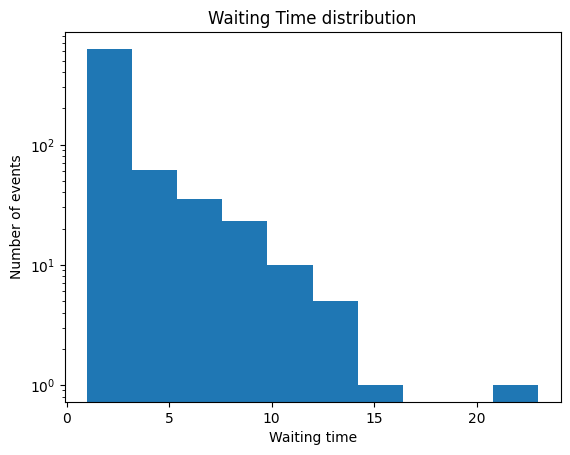

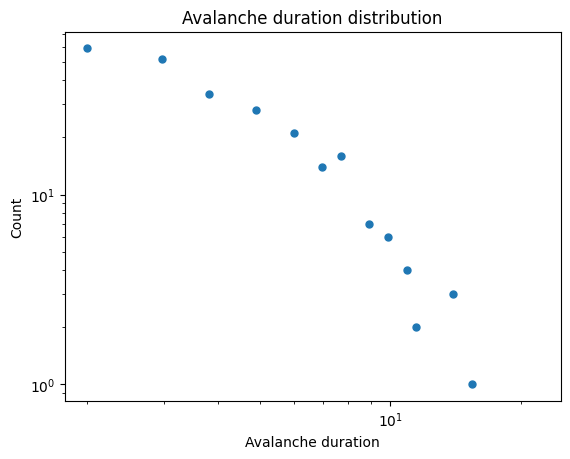

In [5]:


# Compute the pairwise difference between all observed snapshots. This command uses list
# comprehension, a zip generator, and argument unpacking in order to perform this task
# concisely.
all_events =  [pile.check_difference(*states) for states in zip(pile.history[:-1], pile.history[1:])]
# remove transients before the self-organized critical state is reached
all_events = all_events[100:]
# index each timestep by timepoint
all_events = list(enumerate(all_events))
# remove cases where an avalanche did not occur
all_avalanches = [x for x in all_events if x[1] > 1]
all_avalanche_times = [item[0] for item in all_avalanches]
all_avalanche_sizes = [item[1] for item in all_avalanches]
all_avalanche_durations = [event1 - event0 for event0, event1 in zip(all_avalanche_times[:-1], all_avalanche_times[1:])]


## Waiting time distribution
waiting_times = np.diff(np.array(all_avalanche_times))
plt.figure()
plt.semilogy()
plt.hist(waiting_times)
plt.title('Waiting Time distribution')
plt.xlabel('Waiting time')
plt.ylabel('Number of events')

## Duration distribution
log_bins = np.logspace(np.log10(2), np.log10(np.max(all_avalanche_durations)), 50) # logarithmic bins for histogram
vals, bins = np.histogram(all_avalanche_durations, bins=log_bins)
plt.figure()
plt.loglog(bins[:-1], vals, '.', markersize=10)
plt.title('Avalanche duration distribution')
plt.xlabel('Avalanche duration')
plt.ylabel('Count')

### Test and use your code

+ You don't need to write any code below, these cells are just to confirm that everything is working and to play with your sandpile implementation
+ If you are working from a local fork of the entire course, then you already have access to the solutions. In this case, make sure to `git pull` to make sure that you are up-to-date (save your work first).
+ If you are working from a single downloaded notebook, or are working in Google Colab, then you will need to manually download the solutions file from the course repository. The lines below will do this for you.

In [6]:
# import os
# import requests
# # Check if the "solutions" directory exists. If not, create it and download the solution file
# if not os.path.exists('solutions'):
#     os.makedirs('solutions')
# else:
#     print('Directory "solutions" already exists. Skipping creation.')

# # Now download the solution file into the directory we just created
# url = 'https://raw.githubusercontent.com/williamgilpin/cphy/main/hw/solutions/sandpile.py'
# response = requests.get(url)
# file_path = os.path.join('solutions', 'sandpile.py')
# if not os.path.exists(file_path):
#     with open(file_path, 'wb') as file:
#         file.write(response.content)
#     print(f'File saved to {file_path}')
# else:
#     print(f'File already exists at {file_path}, not overwritten.')

# ## Import Instructor's solution from answer key
# # from solutions.sandpile import AbelianSandpileIterative as AbelianSandpile
# # from solutions.sandpile import AbelianSandpileBFS as AbelianSandpile
# # from solutions.sandpile import AbelianSandpileDFS as AbelianSandpile


In [7]:
# # Run sandpile simulation
# model = AbelianSandpile(n=100, random_state=0)

# plt.figure()
# plt.imshow(model.grid, cmap='gray')
# plt.title("Initial State")

# model.simulate(10000)
# plt.figure()
# plt.imshow(model.grid, cmap='gray')
# plt.title("Final state")




# # Compute the pairwise difference between all observed snapshots. This command uses list
# # comprehension, a zip generator, and argument unpacking in order to perform this task
# # concisely.
# all_events =  [model.check_difference(*states) for states in zip(model.history[:-1], model.history[1:])]
# # remove transients before the self-organized critical state is reached
# all_events = all_events[1000:]
# # index each timestep by timepoint
# all_events = list(enumerate(all_events))
# # remove cases where an avalanche did not occur
# all_avalanches = [x for x in all_events if x[1] > 1]
# all_avalanche_times = [item[0] for item in all_avalanches]
# all_avalanche_sizes = [item[1] for item in all_avalanches]
# all_avalanche_durations = [event1 - event0 for event0, event1 in zip(all_avalanche_times[:-1], all_avalanche_times[1:])]


# ## Waiting time distribution
# waiting_times = np.diff(np.array(all_avalanche_times))
# plt.figure()
# plt.semilogy()
# plt.hist(waiting_times)
# plt.title('Waiting Time distribution')
# plt.xlabel('Waiting time')
# plt.ylabel('Number of events')

# ## Duration distribution
# log_bins = np.logspace(np.log10(2), np.log10(np.max(all_avalanche_durations)), 50) # logarithmic bins for histogram
# vals, bins = np.histogram(all_avalanche_durations, bins=log_bins)
# plt.figure()
# plt.loglog(bins[:-1], vals, '.', markersize=10)
# plt.title('Avalanche duration distribution')
# plt.xlabel('Avalanche duration')
# plt.ylabel('Count')

# ## Visualize activity of the avalanches
# # Make an array storing all pairwise differences between the lattice at successive
# # timepoints
# all_diffs = np.abs(np.diff(np.array(model.history), axis=0))
# all_diffs[all_diffs > 0] = 1
# all_diffs = all_diffs[np.sum(all_diffs, axis=(1, 2)) > 1] # Filter to only keep big events
# most_recent_events = np.sum(all_diffs[-100:], axis=0)
# plt.figure(figsize=(5, 5))
# plt.imshow(most_recent_events)
# plt.title("Avalanche activity in most recent timesteps")


### Additional information


The BTK model is called the "Abelian" sandpile because the final stable configuration is invariant to the order of toppling events. For example, instead of toppling the pile to completion after each addition, we could add $M$ several grains at once, and then perform a series of topples selecting unstable sites in any order until a stable configuration is achieved. The final sandpile would be identical to the one we would get if we simulated the pile through $M$ full additions sequentially. The Abelian property also means that we have a variety of choices of algorithms for implementing the toppling process resulting from the addition of a single grain; the sandpile will return the same solution regardless of whether a breadth-first search, depth-first search, or iterative solution is used. Importantly, each of these solution methods is, in principle, simulating a different physical process and chain of events, but the particular Abelian property of this model means that the final solution is identical.

Another member of our department, Michael Marder, has a [paper from 1992 in which he and his student Steve Kramer propose a cellular automaton model of river formation.](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.68.205). The update rules and structure of implementing this simulation have many simularities to the BTK model.

Among cellular automata, the BTW model is not only unique for its asynchronous nature, but also because it has a "derivative" ruleset in contrast to the "integral"/totalistic ruleset seen in better-known systems like the Game of Life: instead of updating a cell based on the sum of all its neighbors, we update all neighbors based on the state of a cell. A similar distinction arises in other types of dynamical systems; for example, when numerically integrating partial differential equations, finite difference methods update each lattice point based on their differences from neighboring points, approximating spatial derivatives. However, for many classes of partial differential equations, finite element methods instead update each lattice point based on the weighted average of all its neighbors, approximating spatial integrals.



### Extra  code for animations
+ No need to run this, but this code allows you to visualize the sandpile as it evolves over time.

In [8]:
# from matplotlib.animation import FuncAnimation
# from IPython.display import HTML

# activity_sliding2 = all_diffs[-500:]
# vmin = np.percentile(activity_sliding2, 1)
# # vmin = 0
# vmax = np.percentile(activity_sliding2, 99.8)

# # Assuming frames is a numpy array with shape (num_frames, height, width)
# frames = np.array(activity_sliding2).copy() 

# fig = plt.figure(figsize=(6, 6))
# img = plt.imshow(frames[0], vmin=vmin, vmax=vmax);
# plt.xticks([]); plt.yticks([])
# # tight margins
# plt.margins(0,0)
# plt.gca().xaxis.set_major_locator(plt.NullLocator())

# def update(frame):
#     img.set_array(frame)

# ani = FuncAnimation(fig, update, frames=frames, interval=50)
# HTML(ani.to_jshtml())

In [9]:
# all_diffs = np.abs(np.diff(np.array(model.history), axis=0))
# # all_diffs = all_diffs[np.sum(all_diffs, axis=(1, 2)) > 1] # Filter to only keep big events

# # Use a trick to calculate the sliding cumulative sum
# activity_cumulative = np.cumsum(all_diffs, axis=0)
# # activity_sliding = activity_cumulative[50:] - activity_cumulative[:-50]
# activity_sliding = all_diffs

# plt.figure(figsize=(5, 5))
# plt.imshow(activity_sliding[-1])

In [10]:
# # This code saves the sliding cumulative sum as a movie. No need to run this cell

# activity_sliding2 = activity_sliding[-500:]
# vmin = np.percentile(activity_sliding2, 1)
# # vmin = 0
# vmax = np.percentile(activity_sliding2, 99.8)
# for i in range(len(activity_sliding2) - 1):
    
#     out_path = "private_dump/sandpile/frame" + str(i).zfill(4) + ".png"

#     plt.figure()
#     plt.imshow(activity_sliding2[i], vmin=vmin, vmax=vmax)

#     ax = plt.gca()
#     ax.set_axis_off()
#     ax.xaxis.set_major_locator(plt.NullLocator())
#     ax.yaxis.set_major_locator(plt.NullLocator())
#     ax.set_aspect(1, adjustable='box')

#     plt.savefig(out_path, bbox_inches='tight', pad_inches=0.0, dpi=300)
#     plt.close() 



# Percolation

The BTK cellular automaton represents a great example of a simple, toy computational model that exhibits non-trivial properties found in other, much more elaborate problems. It can be considered a [dynamical universality class](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.72.1690), meaning that many problems map onto it, independently of their microscopic details.

Here, we will consider a well-known example of a universality class describing a nonequilibrium phase transition: the directed percolation problem. This problem is usually attributed to [Broadbent & Hammersley in 1957](https://www.cambridge.org/core/journals/mathematical-proceedings-of-the-cambridge-philosophical-society/article/percolation-processes/C00CC4943F48228F8AC8031092FE84EC).

The basic idea is deceptively simple: given a D-dimensional lattice (for our purposes, a 2D grid), we randomly mark sites as "blocked" with probability $p$. The remaining sites are "open" for water to flow. For a given value of $p$, what is the probability that water poured into the top of the lattice will percolate to the bottom row through a chain of connected open sites? This problem is *directed percolation* because it has a preferred direction (water flows from top to bottom). We will assume two open sites are connected if one is north, south, east, or west of the other---but *not* diagonal. This corresponds to [von Neumann neighborhood rules](https://en.wikipedia.org/wiki/Von_Neumann_neighborhood).

A percolation simulation should take a binary array, and return True if it percolates, and False if it does not. There are many ways to implement a percolation algorithm, most of which involve simulating the addition of water to the grid. 
+ *Iterative Solution.* One option would be start with the top row, mark all open sites as "filled," and then pass to the next row and search for open sites connected to filled sites. Some addtional care is required, however, because water can pass through channels within a row until it reaches sites that are not directly below filled sites. One workaround would be to perform multiple iterative passes until the filled lattice stops changing. Another edge case is the case where water needs to pass through an uphill channel in order to make it to the bottom---this can be solved by passing over the lattice first from top to bottom, and then vice versa.
+ *Depth-first search (DFS).* Another simulation option would be a depth-first-search, where we start from each site on the top row and we search for any chain of North/Sout/East/West hops that leads to the other side of the lattice, marking all visited sites as filled with water. This last methods demonstrates the conceptual simularity between directed percolation and solving a maze puzzle; the only difference that the "blocked" sites in a maze are non-random. 

Here we are going to implemented a directed percolation model, and then perform experiments with it in order to determine how the percolation probability depends on the fraction of blocked sites $p$.

## To Do







### To Do

*Please complete the following tasks and answer the included questions. You can edit a Markdown cell in Jupyter by double-clicking on it. To return the cell to its formatted form, press `[Shift]+[Enter]`.*

1. Implement a two dimensional directed percolation model in Python. Below, there is a code outline for the iterative solution. There are at least two ways to solve this problem.
    + The iterative solution simulates water pouring into the top row, and then iterate over rows and sites. With this solution, there is some difficulty regarding how to handle the case where water can flow through a channel from right to left, even though we normally iterate from left to right. This can be solved by passing over each row twice. However, there is also a the case where water needs to pass uphill through a channel before it can proceed downhill. This can be solved by passing over the lattice from top to bottom, and then vice versa.
    + The recursive solution traces all possible paths from the top row to the bottom row, similar to solving a labyrinth. To use this solution, you will need to add an additional private method `_flow_recursive(i, j)` that contains the recursive logic.

```
    For my implementation, I used the following fact: there is no percolation IFF there exists some wall of blocked sites connecting the left and right sides of the grid where the connection is allowed to include diagonal neighbors.  Thus, I implemented the percolation by finding the blocked sites in the first column of the grid, then tracing that along to the right to see if there will be a connection of blocked sites (including diagonals) to the last column of the grid.

    This doesn't feel very clean, but it is almost exactly equivalent to the "labyrinth" method, as you call it.  It is interesting that the only difference is whether or not to include diagonal connections.  I wonder if this makes the algorithm any quicker than the von Neumann neighbor labyrinth search.  I don't think I will test it this time around, but I hypothesize that it will be slightly slower, since I am running all searches at once from left to right; this will take more memory than the von Neumann neighbors labyrinth method purely because an object has more neighbors if we include diagonals.

    Now I wonder whether this problem can be solved using graph theory.  Say we are given a graph which is made up nodes representing blocked sites and connections representing a connection between two blocked sites, then we simply check if the graph has any disjoint components, i.e. it is not completely connected.  This is likely equivalent to checking some simple condition of a matrix which represents the graph.  The only problem is that for larger grids, the algorithm will probably get very slow, as algorithm complexity will likely scale as the number of total elements of the matrix.  But maybe graph theory wizards know of some kind of shortcuts to computing this condition.  I decided not to try this method.
```

2. Perform replicate simulations using the code provided below, and create a plot showing how the probability of percolation changes as a function of $p$ (the blockage probability). Beyond seeing the percolation to clogging transition, you'll notice that the variance in the outcome of your simulations behaves unexpectedly. What is going on here? (Hint: If you've studied the Ising model, you've seen something like this before)

```
    I put my plots below my implementation.

    The transition from percolation to clogging is interesting, but for the standard deviation results, I do not think it is THAT shocking.  However, it is strange that the peak is located at an average site blocking probability of roughly 40% rather than 50%, but this is probably because of the neighbor conditions for percolation.  The open sites need a connected path of von Neumann neighbors to percolate, but the blocked sites need a connected path which includes diagonal neighbors.  This might give clogging a slight probabilistic advantage.

    As for the variance itself peaking at the transition point, this does not shock me.  In general, the smaller the probability of site blocking, the more we expect percolation, but as we increase to a coin flip for site blocking, then percolation probability will also begin to resemble a coin flip; it will not be as easy to guess whether a random grid will be able to percolate, thus the standard deviation should be higher.  My intuition telling me this, it would not seem so crazy that we get the results that we have.
```

3. Theoretically, does the transition point seen in our empirical results align with your intuition? Why does its value differ from $p=0.5$? *(Hint: think about sites versus connections between sites).*

```
    I described my answer to this above ^
```

4. How does the memory usage and runtime of your percolation model implement scale with the lattice size? You can answer this empirically or theoretically.

```
    For my implementation, it would probably get worse with size.... much worse.  This is because my algorithm runs each snake at once.  For a bigger grid, there is more to run.

    If p is the given probability, then for a given size n^2, I will search slightly less than p*n^2 sites.  So my algorithm's memory scaling is ~n^2 for n being the number of rows or columns of my grid.
```

5. One way to sweep the control parameter $p$ would be to start in a limit where most of the sites are blocked, and then gradually open up individual sites one at a time until the lattice percolates. A video of a simulation where the lattice is gradually opened can be seen [here](https://vimeo.com/747772333). How do the different events in this gradually unblocked percolation simulation relate to the two timescales we saw in the sandpile problem?

```
    I am not exactly sure what this question means, but I will give my best attempt at an answer.

    For large values of p, the lattice will be mostly filled and an open site is unlikely to have many neighbors, and the connections will be short.  This will make the algorithm quick to run at start.  However, as the site gradually opens up, the few open sites are now more likely to connect with one another.  This is like how adding grains of sand gradually makes for more connected critical sites.  Then, a linking between two large sectors of open sites is like the endgame type avalanches we saw in the Abelian sandpile problem.  Large sectors of open sites will appear more frequently as we open up the lattice to the point where it is possible to connect large chunks of the board with opening.
```

In [13]:
class PercolationSimulation:

    def __init__(self, size=100, p=.5, random_seed=None, initial_condition=None):
        # i have an initial condition argument in case I wanted to specify that

        np.random.seed(random_seed)

        if initial_condition is not None:
            self.grid = initial_condition
            self.size = len(initial_condition)
            self.p = p # this doesn't actually matter if we specify an initial condition
        else:
            self.size = size
            self.p = p
            # ``random.binomial`` is a coin flipper with probability ``p`` of landing 1
            self.grid = np.random.binomial(1,self.p,(size,size))

    def percolate(self):
        # my percolation algorithm looks at connected BLOCKED sites
        # from the left side of the grid to the right

        # look at the left-most blocked sites first
        # ``points_of_interest`` will be a twople `` ( row array ,  column array )
        points_of_interest=(
            np.nonzero(self.grid[:,0])[0],
            np.zeros(len(self.grid[:,0][self.grid[:,0]>0]),dtype=int)
        )
        
        # store an array of points looked at
        # (will come in handy later)
        prev_PoI = np.array(points_of_interest).T

        # ^ all of this weird formatting will be useful

        while True: # run a loop which searches through connected blocked sites

            # if our snake has reached the end or if we have nowhere else to go, then break
            if np.any(points_of_interest[1]==self.size-1) or points_of_interest[1].size==0: break

            # search the neigbors of our points of interest
            # for blocked sites, then compare those points
            # to ones we've already catalogued
            next_PoI = self._compare(
                newpoints = self._search_for_blocks(
                    self._neighbors(points_of_interest)
                ),
                oldpoints = prev_PoI
            )

            # update our points
            prev_PoI = np.r_[prev_PoI,next_PoI] # we have found ones here
            points_of_interest = (next_PoI.T[0],next_PoI.T[1]) # next to snake around
        
        # finally, tell us if we found a connection to the other side
        return not np.any(prev_PoI.T[1]==self.size-1)


    def _search_for_blocks(self, points):
        # ``points = ( row array , columns array )``
        # return an array of which sites from ``points`` have 1
        return np.array(points).T[np.nonzero(self.grid[points])]
        # output looks like [ [ site row , site column ] , [ etc ] , ... ]
        # it's a one-line operation, but the code would
        # get really clogged up if i didn't make this function

    def _neighbors(self, points):
        # points is a twople of arrays: ``points = ( row array , column array )``
        # this returns the neighbors of the points, including diagonals
        # behind, in front, row above from left to right, row below from left to right

        # and we make sure that our output has a unique set of points
        # that are within the bounds of the grid

        # i know it looks ugly, but i did it all in only a couple of steps

        # all neighbors, not a unique set
        all_neighbors = np.array(
            [
                # rows
                np.r_[np.r_[2*(points[0],)],
                      np.r_[3*(points[0]-1,)],
                      np.r_[3*(points[0]+1,)]]
                ,
                # columns
                np.r_[points[1]-1,points[1]+1,
                      np.r_[2*(points[1]-1,points[1],points[1]+1)]]
            ]
        ) # array([row array],[column array])
          # the formatting is somewhat particular
        
        # delete spaces outside of boundary
        all_neighbors = np.delete(all_neighbors,
                                  np.nonzero(
                                      np.logical_or(all_neighbors==-1,all_neighbors==self.size)
                                      )[1],
                                  axis=1
                                 )
        
        # unique neighbors
        rows,cols=np.unique(all_neighbors.T,axis=0).T

        return (rows,cols)
    
    def _compare(self, newpoints, oldpoints):
        # newpoints and oldpoints are arrays of coordinates
        # [ [ row , column ] , [ etc ] , ... ]

        comparisons = np.unique(
            np.r_[newpoints,np.r_[(oldpoints,)*2]],
            axis=0,
            return_counts=True
            )

        return np.delete(comparisons[0],np.nonzero(comparisons[1]-1)[0],axis=0)


In [ ]:
# class PercolationSimulation:
#     """
#     A simulation of a 2D directed percolation problem. Given a 2D lattice, blocked sites
#     are denoted by 0s, and open sites are denoted by 1s. During a simulation, water is
#     poured into the top of the grid, and allowed to percolate to the bottom. If water
#     fills a lattice site, it is marked with a 2 in the grid. Water only reaches a site
#     if it reaches an open site directly above, or to the immediate left or right 
#     of an open site.

#     I've included the API for my solution below. You can use this as a starting point, 
#     or you can re-factor the code to your own style. Your final solution must have a 
#     method called percolate that creates a random lattice and runs a percolation 
#     simulation and
#     1. returns True if the system percolates
#     2. stores the original lattice in self.grid
#     3. stores the water filled lattice in self.grid_filled

#     + For simplicity, use the first dimension of the array as the percolation direction
#     + For boundary conditions, assume that any site out of bounds is a 0 (blocked)
#     + You should use numpy for this problem, although it is possible to use lists 



#     Attributes:
#         grid (np.array): the original lattice of blocked (0) and open (1) sites
#         grid_filled (np.array): the lattice after water has been poured in
#         n (int): number of rows and columns in the lattice
#         p (float): probability of a site being blocked in the randomly-sampled lattice
#             random_state (int): random seed for the random number generator
#         random_state (int): random seed for numpy's random number generator. Used to 
#             ensure reproducibility across random simulations. The default value of None
#             will use the current state of the random number generator without resetting
#             it.
#     """

#     def __init__(self, n=100, p=0.5, grid=None, random_state=None):
#         """
#         Initialize a PercolationSimulation object.

#         Args:
#             n (int): number of rows and columns in the lattice
#             p (float): probability of a site being blocked in the randomly-sampled lattice
#             random_state (int): random seed for numpy's random number generator. Used to
#                 ensure reproducibility across random simulations. The default value of None
#                 will use the current state of the random number generator without resetting
#                 it.
#         """

#         self.random_state = random_state # the random seed

#         # Initialize a random grid if one is not provided. Otherwise, use the provided
#         # grid.
#         if grid is None:
#             self.n = n
#             self.p = p
#             self.grid = np.zeros((n, n))
#             self._initialize_grid()
#         else:
#             assert len(np.unique(np.ravel(grid))) <= 2, "Grid must only contain 0s and 1s"
#             self.grid = grid.astype(int)
#             # override numbers if grid is provided
#             self.n = grid.shape[0]
#             self.p = 1 - np.mean(grid)

#         # The filled grid used in the percolation calculation. Initialize to the original
#         # grid. We technically don't need to copy the original grid if we want to save
#         # memory, but it makes the code easier to debug if this is a separate variable 
#         # from self.grid.
#         self.grid_filled = np.copy(self.grid)

#     def _initialize_grid(self):
#         """
#         Sample a random lattice for the percolation simulation. This method should
#         write new values to the self.grid and self.grid_filled attributes. Make sure
#         to set the random seed inside this method.

#         This is a helper function for the percolation algorithm, and so we denote it 
#         with an underscore in order to indicate that it is not a public method (it is 
#         used internally by the class, but end users should not call it). In other 
#         languages like Java, private methods are not accessible outside the class, but
#         in Python, they are accessible but external usage is discouraged by convention.

#         Private methods are useful for functions that are necessary to support the 
#         public methods (here, our percolate() method), but which we expect we might need
#         to alter in the future. If we released our code as a library, others might 
#         build software that accesses percolate(), and so we should not alter the 
#         input/outputs because it's a public method
#         """
#         ###############################################################################
#         #
#         #
#         ####### YOUR CODE HERE  ####### 
#         raise NotImplementedError("Implement this method")
#         # Hint: my solution is 3 lines of code in numpy
#         #
#         #
#         ###############################################################################
        

#     def _flow_recursive(self, i, j):
#         """
#         Only used if we opt for a recursive solution.

#         The recursive portion of the flow simulation. Notice how grid and grid_filled
#         are used to keep track of the global state, even as our recursive calls nest
#         deeper and deeper
#         """
        
#         ####### YOUR CODE HERE  #######################################################
#         raise NotImplementedError("Implement this method")
#         #
#         #
#         # Remember to check the von Neumann neighborhood of the current site. There should
#         # be 4 recursive calls in total, and 4 base cases
#         #
#         #
#         ###############################################################################s


#     def _poll_neighbors(self, i, j):
#         """
#         Check whether there is a filled site adjacent to a site at coordinates i, j in 
#         self.grid_filled. Respects boundary conditions.
#         """

#         ####### YOUR CODE HERE  #######################################################
#         raise NotImplementedError("Implement this method")
#         #
#         #
#         # Hint: my solution is 4 lines of code in numpy, but you may get different 
#         # results depending on how you enforce the boundary conditions in your solution.
#         # Not needed for the recursive solution
#         #
#         #
#         ###############################################################################



#     def _flow(self):
#         """
#         Run a percolation simulation using recursion

#         This method writes to the grid and grid_filled attributes, but it does not
#         return anything. In other languages like Java or C, this method would return
#         void
#         """
#         ###############################################################################
#         raise NotImplementedError("Implement this method")
#         ####### YOUR CODE HERE  ####### 
#         # Hintsmy non-recursive solution contains one row-wise for loop, which contains 
#         # several loops over individual lattice sites. You might need to visit each lattice 
#         # site more than once per row. In my implementation, split the logic of checking
#         # the von neumann neighborhood into a separate method _poll_neighbors, which
#         # returns a boolean indicating whether a neighbor is filled
#         #
#         # My recursive solution calls a second function, _flow_recursive, which takes 
#         # two lattice indices as arguments

#         ###############################################################################



#     def percolate(self):
#         """
#         Initialize a random lattice and then run a percolation simulation. Report results
#         """
#         ###############################################################################

#         ####### YOUR CODE HERE  ####### 
#         raise NotImplementedError("You must implement this method")
#         # Hint: my solution is 3 lines of code, and it just calls other methods in the
#         # class, which do the heavy lifting

#         ###############################################################################




### Test and use your code

+ You don't need to write any new code below, these cells are just to confirm that everything is working and to play with the your percolation implementation
+ If you are working from a local fork of the entire course, then you already have access to the solutions. In this case, make sure to `git pull` to make sure that you are up-to-date (save your work first).
+ If you are working from a single downloaded notebook, or are working in Google Colab, then you will need to manually download the solutions file from the course repository. The lines below will do this for you.

In [17]:
# import os
# import requests
# # Check if the "solutions" directory exists. If not, create it and download the solution file
# if not os.path.exists('solutions'):
#     os.makedirs('solutions')
# else:
#     print('Directory "solutions" already exists. Skipping creation.')

# # Now download the solution file into the directory we just created
# url = 'https://raw.githubusercontent.com/williamgilpin/cphy/main/hw/solutions/percolation.py'
# response = requests.get(url)
# file_path = os.path.join('solutions', 'percolation.py')
# if not os.path.exists(file_path):
#     with open(file_path, 'wb') as file:
#         file.write(response.content)
#     print(f'File saved to {file_path}')
# else:
#     print(f'File already exists at {file_path}, not overwritten.')

# # Import Instructor's solution
# # from solutions.percolation import PercolationSimulation
# # from solutions.percolation_iterative import PercolationSimulation

In [18]:
# from matplotlib.colors import LinearSegmentedColormap
# def plot_percolation(mat):
#     """
#     Plots a percolation matrix, where 0 indicates a blocked site, 1 indicates an empty 
#     site, and 2 indicates a filled site
#     """
#     cvals  = [0, 1, 2]
#     colors = [(0, 0, 0), (0.4, 0.4, 0.4), (0.372549, 0.596078, 1)]

#     norm = plt.Normalize(min(cvals), max(cvals))
#     tuples = list(zip(map(norm,cvals), colors))
#     cmap = LinearSegmentedColormap.from_list("", tuples)
#     plt.imshow(mat, cmap=cmap, vmin=0, vmax=2)


# model = PercolationSimulation(n=20, random_state=0, p=0.1)
# print(model.percolate())
# plt.figure()
# plot_percolation(model.grid_filled)

# model = PercolationSimulation(n=20, random_state=0, p=0.4)
# print(model.percolate())
# plt.figure()
# plot_percolation(model.grid_filled)


# model = PercolationSimulation(n=20, random_state=0, p=0.9)
# print(model.percolate())
# plt.figure()
# plot_percolation(model.grid_filled)

Run replicate simulations across replicates with different bond occupation probabilities

The percolation probability represents an effective order parameter for this system, and
so we will attempt to calculate the percolation probability by performing many replicate
simulations at different values of the control parameter $p$.

Running replicate simulations for p = 0.0
Running replicate simulations for p = 0.041666666666666664
Running replicate simulations for p = 0.08333333333333333
Running replicate simulations for p = 0.125
Running replicate simulations for p = 0.16666666666666666
Running replicate simulations for p = 0.20833333333333331
Running replicate simulations for p = 0.25
Running replicate simulations for p = 0.29166666666666663
Running replicate simulations for p = 0.3333333333333333
Running replicate simulations for p = 0.375
Running replicate simulations for p = 0.41666666666666663
Running replicate simulations for p = 0.4583333333333333
Running replicate simulations for p = 0.5
Running replicate simulations for p = 0.5416666666666666
Running replicate simulations for p = 0.5833333333333333
Running replicate simulations for p = 0.625
Running replicate simulations for p = 0.6666666666666666
Running replicate simulations for p = 0.7083333333333333
Running replicate simulations for p = 0.75
Running

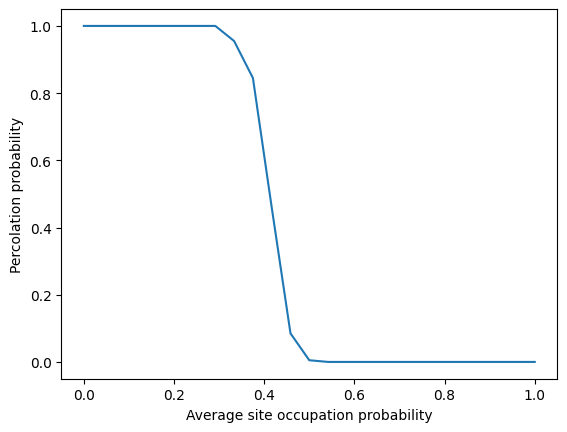

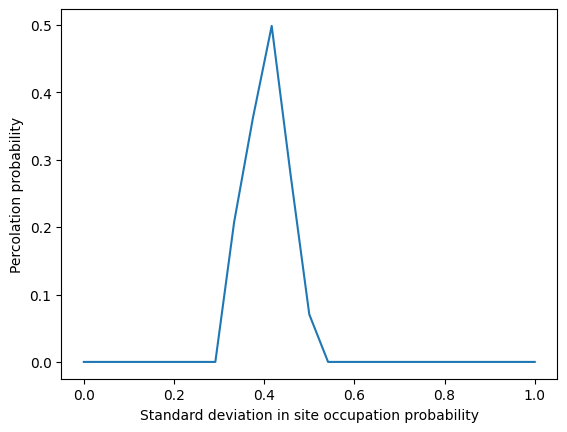

In [ ]:
pvals = np.linspace(0, 1, 25) # control parameter for percolation phase transition
n_reps = 200 # number of times to repeat the simulation for each p value

all_percolations = list()
for p in pvals:
    print("Running replicate simulations for p = {}".format(p), flush=True)
    all_replicates = list()
    for i in range(n_reps):
        # Initialize the model
        model = PercolationSimulation(size=30, p=p)
        all_replicates.append(model.percolate())
    all_percolations.append(all_replicates)

plt.figure()
plt.plot(pvals, np.mean(np.array(all_percolations), axis=1))
plt.xlabel('Average site occupation probability')
plt.ylabel('Percolation probability')

plt.figure()
plt.plot(pvals, np.std(np.array(all_percolations), axis=1))
plt.xlabel('Average site occupation probability')
plt.ylabel('standard deviation of Percolation probability')

plt.show()


Finished simulation 0
Finished simulation 500
Finished simulation 1000
Finished simulation 1500
Finished simulation 2000
Finished simulation 2500
Finished simulation 3000
Finished simulation 3500
Finished simulation 4000
Finished simulation 4500


(array([  1.,   0.,   0.,   0.,   3.,   2.,  11.,  10.,  21.,  23.,  40.,
         42.,  64.,  90.,  99., 130., 170., 154., 202., 247., 290., 260.,
        319., 323., 281., 299., 295., 290., 210., 227., 192., 174., 125.,
        117.,  84.,  52.,  57.,  26.,  27.,  17.,   6.,   5.,   8.,   2.,
          0.,   1.,   1.,   0.,   1.,   2.]),
 array([5741.  , 5748.72, 5756.44, 5764.16, 5771.88, 5779.6 , 5787.32,
        5795.04, 5802.76, 5810.48, 5818.2 , 5825.92, 5833.64, 5841.36,
        5849.08, 5856.8 , 5864.52, 5872.24, 5879.96, 5887.68, 5895.4 ,
        5903.12, 5910.84, 5918.56, 5926.28, 5934.  , 5941.72, 5949.44,
        5957.16, 5964.88, 5972.6 , 5980.32, 5988.04, 5995.76, 6003.48,
        6011.2 , 6018.92, 6026.64, 6034.36, 6042.08, 6049.8 , 6057.52,
        6065.24, 6072.96, 6080.68, 6088.4 , 6096.12, 6103.84, 6111.56,
        6119.28, 6127.  ]),
 <BarContainer object of 50 artists>)

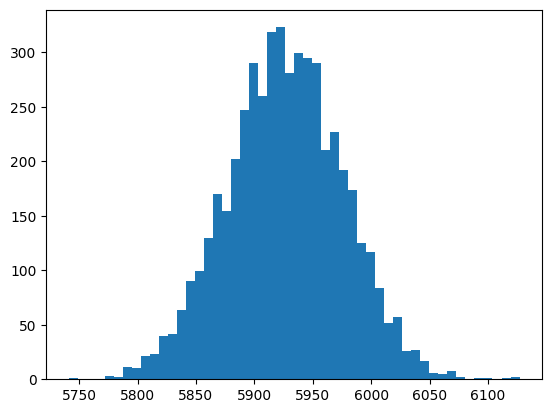

In [20]:
## Just from curiousity, plot the distribution of cluster sizes at the percolation threshold
## why does it appear to be bimodal?
all_cluster_sizes = list()
p_c = 0.407259
n_reps = 5000
for i in range(n_reps):
    model = PercolationSimulation(size=100, p=p_c)
    model.percolate()
    cluster_size = np.sum(model.grid == 0)
    all_cluster_sizes.append(cluster_size)

    if i % 500 == 0:
        print("Finished simulation {}".format(i), flush=True)

all_cluster_sizes = np.array(all_cluster_sizes)

plt.figure()
plt.hist(all_cluster_sizes, 50)

# Additional information

Directed percolation maps onto all sorts of interesting problems in physics and graph theory. There are very direct applications of percolation to [flow in porous media](https://iopscience.iop.org/article/10.1088/0305-4470/14/5/012/meta), as well as [electrical conductance](https://journals.aps.org/prb/abstract/10.1103/PhysRevB.26.5293) and [light propagation in disordered materials](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.99.234503). A great example of the broader relevance of the directed percolation universality class is [recent work](https://www.nature.com/articles/nphys3548) showing similar scaling exponents describing both ecological collapse and pipe turbulence, which arise due to both systems belonging to the Directed Percolation universality class. [Another recent paper](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1007508) uses percolation theory to understand electrical signalling between neighboring cells in a biofilm. 

For more information about the mathematical theory of percolation, [Kim Christensen's notes on the subject](https://web.mit.edu/ceder/publications/Percolation.pdf) provide a detailed introduction.


## Optional code and extras

Create a simulation where we iteratively fill out one lattice, in order to make a video of our percolation simulation

In [21]:
# initial_lattice = np.zeros((50, 50))

# # Decide the order in which sites become blocked
# np.random.seed(0)
# all_lattice_indices = np.array(
#     [(i, j) for i in range(initial_lattice.shape[0]) for j in range(initial_lattice.shape[1])]
# )
# np.random.shuffle(all_lattice_indices)

# # does percolate 
# all_grids = list()
# for inds in all_lattice_indices:
    
#     initial_lattice[inds[0], inds[1]] = 1
#     model = PercolationSimulation(grid=initial_lattice)
#     model.percolate()

#     if (model.p > 0.3) and (model.p < 0.7):
#         all_grids.append(np.copy(model.grid_filled))

    

In [22]:
# ## Make an interactive video
# from ipywidgets import interact, interactive, fixed, interact_manual, Layout
# import ipywidgets as widgets

# def plotter(i):
#     fig = plt.figure(figsize=(10, 10))
#     plot_percolation(all_grids[i])
#     plt.show()



# interact(
#     plotter, 
#     i=widgets.IntSlider(0, 0, len(all_grids) - 1, layout=Layout(width='500px'))
# )

# Appendix and Extras

This is William's leftover code for making videos and figures; no need to run this

In [23]:
# from matplotlib.animation import FuncAnimation
# from IPython.display import HTML

# activity_sliding2 = activity_sliding[-500:]
# vmin = np.percentile(activity_sliding2, 1)
# # vmin = 0
# vmax = np.percentile(activity_sliding2, 99.8)

# # Assuming frames is a numpy array with shape (num_frames, height, width)
# frames = np.array(activity_sliding2).copy() 

# fig = plt.figure(figsize=(6, 6))
# # img = plt.imshow(frames[0], vmin=vmin, vmax=vmax);
# plt.xticks([]); plt.yticks([])
# # tight margins
# plt.margins(0,0)
# plt.gca().xaxis.set_major_locator(plt.NullLocator())

# def update(frame):
#     plot_percolation(all_grids[::2])

# ani = FuncAnimation(fig, update, frames=all_grids[::2], interval=50)
# HTML(ani.to_jshtml())

In [24]:
# # (Optional) I used this code to export still images, and then make a video from them using
# # the command-line tool ffmpeg


# for i in range(len(all_grids[::2]) - 1):
    
    
#     out_path = "private_dump/percolation/frame" + str(i).zfill(4) + ".png"

#     plt.figure()
#     plot_percolation(all_grids[::2][i])

#     ax = plt.gca()
#     ax.set_axis_off()
#     ax.xaxis.set_major_locator(plt.NullLocator())
#     ax.yaxis.set_major_locator(plt.NullLocator())
#     ax.set_aspect(1, adjustable='box')

#     plt.savefig(out_path, bbox_inches='tight', pad_inches=0.0, dpi=160)
#     plt.close()



In [25]:
# # (Optional) I used this code to stitch the images together into a video. The %%bash magic tells
# # iPython to treat these lines as bash commands, rather than Python. I then use the 
# # command-line tool `ffmpeg` to stitch the images together into a video.

# %%bash
# ffmpeg -r 60 -i private_dump/percolation/frame%04d.png -vf "scale=trunc(iw/2)*2:trunc(ih/2)*2" -vcodec libx264 -pix_fmt yuv420p private_dump/percolation/vid2.mov
